In [1]:
# Ensure before this step, the framework of dataset has been properly handled (for more details, look up at previous notebooks).
# Preamble 
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
import random
from IPython.display import display, Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler
from collections import OrderedDict

#deactivate warnings
import warnings
warnings.filterwarnings("ignore")

In [18]:
%%time
# Read in sampled data
data = pd.read_csv('/kaggle/input/df_model_clean.csv')
print('rows:',len(data))

# Keep a copy of original data in case of changes made to datafram
df_model = data.copy()

rows: 45657
CPU times: user 115 ms, sys: 11 ms, total: 126 ms
Wall time: 124 ms


In [19]:
import re
df_model = df_model.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df_model.describe()

,Unnamed0,TenancyRef,CurrentTenancy,has_garden,had_HB,TotalMonths,PercentageInArrears,MaxConsecMonths,LongtermArrearsNum,CurrentArrearsLength,LASTARREARSSTATUS,disability
count,45657.000000,45657.000000,45657.000000,45657.000000,45657.000000,45657.000000,45657.000000,45657.000000,45657.000000,45657.000000,45657.000000,45657.000000
mean,22828.000000,67138.550956,0.675165,0.270561,0.498763,49.394354,41.866158,14.643209,0.743676,7.240007,0.387389,0.082704
std,13180.184957,40134.951755,0.468318,0.444254,0.500004,31.566067,38.716545,19.998531,0.916350,16.836438,0.487159,0.275437
min,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11414.000000,36317.000000,0.000000,0.000000,0.000000,19.000000,3.488372,1.000000,0.000000,0.000000,0.000000,0.000000
50%,22828.000000,68054.000000,1.000000,0.000000,0.000000,48.000000,30.769231,6.000000,1.000000,0.000000,0.000000,0.000000
75%,34242.000000,88078.000000,1.000000,1.000000,1.000000,85.000000,82.558140,21.000000,1.000000,5.000000,1.000000,0.000000
max,45656.000000,178137.000000,1.000000,1.000000,1.000000,86.000000,100.000000,86.000000,7.000000,86.000000,1.000000,1.000000


In [20]:
df_model.head(5)

,Unnamed0,TenancyRef,TenancyType,CurrentTenancy,Gender,Language,MaritalStatus,Nationality,Relationship,has_garden,...,Tenure,housing_category,letting_type,TotalMonths,PercentageInArrears,MaxConsecMonths,LongtermArrearsNum,CurrentArrearsLength,LASTARREARSSTATUS,disability
0,0,28434,weekly,1,M,ENGLISH,ND,BRITISH,HEAD,1,...,ASS,GN,NON-F,86,0.000000,0,0,0,0,0
1,1,3,weekly,1,M,ENGLISH,ND,BRITISH,HEAD,0,...,ASS,GN,F,86,31.395349,19,2,8,1,1
2,2,8,weekly,0,F,ENGLISH,ND,NON-BRITISH,HEAD,0,...,SEC,GN,F,54,42.592593,16,1,0,1,0
3,3,100312,weekly,1,F,ND,ND,BRITISH,HEAD,0,...,FIXED,GN,F,32,3.125000,1,0,0,0,0
4,4,15440,weekly,1,M,ENGLISH,SING,NON-BRITISH,HEAD,0,...,AFT,GN,F,86,40.697674,35,1,0,0,0


In [21]:
# setting Tenancy Ref as index
df_model.set_index('TenancyRef', inplace=True)
df_model.head()

,Unnamed0,TenancyType,CurrentTenancy,Gender,Language,MaritalStatus,Nationality,Relationship,has_garden,n_beds,...,Tenure,housing_category,letting_type,TotalMonths,PercentageInArrears,MaxConsecMonths,LongtermArrearsNum,CurrentArrearsLength,LASTARREARSSTATUS,disability
TenancyRef,,,,,,,,,,,,,,,,,,,,,
28434,0,weekly,1,M,ENGLISH,ND,BRITISH,HEAD,1,3.0,...,ASS,GN,NON-F,86,0.000000,0,0,0,0,0
3,1,weekly,1,M,ENGLISH,ND,BRITISH,HEAD,0,1.0,...,ASS,GN,F,86,31.395349,19,2,8,1,1
8,2,weekly,0,F,ENGLISH,ND,NON-BRITISH,HEAD,0,2.0,...,SEC,GN,F,54,42.592593,16,1,0,1,0
100312,3,weekly,1,F,ND,ND,BRITISH,HEAD,0,2.0,...,FIXED,GN,F,32,3.125000,1,0,0,0,0
15440,4,weekly,1,M,ENGLISH,SING,NON-BRITISH,HEAD,0,1.0,...,AFT,GN,F,86,40.697674,35,1,0,0,0


In [22]:
objcol_headers = list(df_model.select_dtypes(include=['object']).columns)
objcol_headers

['TenancyType',
 'Gender',
 'Language',
 'MaritalStatus',
 'Nationality',
 'Relationship',
 'n_beds',
 'OAP',
 'SUCCESSORINDICATOR',
 'SexualOrientation',
 'Tenure',
 'housing_category',
 'letting_type']

In [23]:
# preprocessing object columns

df_model_dummies = pd.get_dummies(data=df_model, columns=objcol_headers, drop_first=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_model_dummies.head(20))

,Unnamed0,CurrentTenancy,has_garden,had_HB,TotalMonths,PercentageInArrears,MaxConsecMonths,LongtermArrearsNum,CurrentArrearsLength,LASTARREARSSTATUS,disability,TenancyType_weekly,Gender_M,Gender_ND,Gender_R,Language_ND,Language_NON-ENGLISH,MaritalStatus_COH,MaritalStatus_DIV,MaritalStatus_MAR,MaritalStatus_ND,MaritalStatus_REFD,MaritalStatus_SEP,MaritalStatus_SING,MaritalStatus_WID,Nationality_ND,Nationality_NON-BRITISH,Relationship_CTEN,Relationship_DTR,Relationship_HEAD,Relationship_ND,Relationship_NON,Relationship_PTR,Relationship_REL,Relationship_SON,n_beds_1.0,n_beds_2.0,n_beds_3.0,n_beds_4.0,n_beds_5.0,n_beds_6.0,n_beds_8.0,n_beds_9.0,n_beds_ND,OAP_ND,OAP_Y,SUCCESSORINDICATOR_Y,SexualOrientation_ND,Tenure_AFT,Tenure_ASS,Tenure_ASSM,Tenure_ASST,Tenure_AST,Tenure_ASTM,Tenure_EQ,Tenure_FIXED,Tenure_FIXEDF,Tenure_LEA,Tenure_LEAA,Tenure_LEACP,Tenure_LEAS,Tenure_LIC,Tenure_NSEC,Tenure_OA,Tenure_PROB,Tenure_PROBF,Tenure_SEC,Tenure_SECM,Tenure_SECURE,Tenure_STAFT,Tenure_STASS,Tenure_STD,Tenure_TAW,housing_category_ND,housing_category_NON-GN,letting_type_ND,letting_type_NON-F
TenancyRef,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
28434,0,1,1,0,86,0.000000,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,0,0,86,31.395349,19,2,8,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2,0,0,1,54,42.592593,16,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
100312,3,1,0,1,32,3.125000,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15440,4,1,0,1,86,40.697674,35,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,1,0,1,86,98.837209,50,2,35,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29721,6,1,0,1,86,54.651163,39,1,4,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,7,1,1,1,86,100.000000,86,1,86,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,8,0,0,0,63,14.285714,9,1,9,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [24]:
df_model_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45657 entries, 28434 to 173897
Data columns (total 77 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed0                 45657 non-null  int64  
 1   CurrentTenancy           45657 non-null  int64  
 2   has_garden               45657 non-null  int64  
 3   had_HB                   45657 non-null  int64  
 4   TotalMonths              45657 non-null  int64  
 5   PercentageInArrears      45657 non-null  float64
 6   MaxConsecMonths          45657 non-null  int64  
 7   LongtermArrearsNum       45657 non-null  int64  
 8   CurrentArrearsLength     45657 non-null  int64  
 9   LASTARREARSSTATUS        45657 non-null  int64  
 10  disability               45657 non-null  int64  
 11  TenancyType_weekly       45657 non-null  uint8  
 12  Gender_M                 45657 non-null  uint8  
 13  Gender_ND                45657 non-null  uint8  
 14  Gender_R         

In [25]:
ref = df_model_dummies.index.names = ['Ref']
df_model_dummies.head()

,Unnamed0,CurrentTenancy,has_garden,had_HB,TotalMonths,PercentageInArrears,MaxConsecMonths,LongtermArrearsNum,CurrentArrearsLength,LASTARREARSSTATUS,...,Tenure_SECM,Tenure_SECURE,Tenure_STAFT,Tenure_STASS,Tenure_STD,Tenure_TAW,housing_category_ND,housing_category_NON-GN,letting_type_ND,letting_type_NON-F
Ref,,,,,,,,,,,,,,,,,,,,,
28434,0,1,1,0,86,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,0,86,31.395349,19,2,8,1,...,0,0,0,0,0,0,0,0,0,0
8,2,0,0,1,54,42.592593,16,1,0,1,...,0,0,0,0,0,0,0,0,0,0
100312,3,1,0,1,32,3.125000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15440,4,1,0,1,86,40.697674,35,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#check for multicollinearity within in dataframe (showcase matrix)
corr_matrix = df_model_dummies.corr()
corr_matrix.head(10)

,Unnamed0,CurrentTenancy,has_garden,had_HB,TotalMonths,PercentageInArrears,MaxConsecMonths,LongtermArrearsNum,CurrentArrearsLength,LASTARREARSSTATUS,...,Tenure_SECM,Tenure_SECURE,Tenure_STAFT,Tenure_STASS,Tenure_STD,Tenure_TAW,housing_category_ND,housing_category_NON-GN,letting_type_ND,letting_type_NON-F
Unnamed0,1.000000,0.005343,-0.127350,-0.513471,-0.270967,-0.197219,-0.287395,-0.207137,-0.175129,-0.162694,...,0.071942,-0.025076,-0.012846,-0.015375,0.005028,0.017152,0.001648,0.659646,0.378497,-0.274279
CurrentTenancy,0.005343,1.000000,0.098821,0.030320,0.491189,-0.194082,0.134800,0.114911,0.002899,-0.201190,...,0.015170,0.024322,-0.023376,-0.044852,0.007952,0.003872,0.010488,-0.141385,-0.162135,0.074578
has_garden,-0.127350,0.098821,1.000000,0.076299,0.053852,0.010208,0.061501,0.043224,0.015749,0.000970,...,-0.034232,-0.007739,-0.000750,-0.009263,-0.002681,-0.006982,-0.008769,-0.142690,-0.394128,0.360406
had_HB,-0.513471,0.030320,0.076299,1.000000,0.177252,0.310800,0.354143,0.284245,0.241243,0.245068,...,0.008018,-0.006027,-0.010769,-0.004831,0.003850,-0.011436,0.000046,-0.458523,-0.139706,0.149384
TotalMonths,-0.270967,0.491189,0.053852,0.177252,1.000000,-0.119654,0.397904,0.358329,0.147338,-0.138792,...,0.045941,-0.020598,-0.020835,-0.041120,0.009300,-0.013642,0.013483,-0.305155,-0.090059,0.088950
PercentageInArrears,-0.197219,-0.194082,0.010208,0.310800,-0.119654,1.000000,0.643388,0.539947,0.538442,0.665974,...,-0.018404,-0.011730,0.017142,0.032411,-0.004123,0.006418,-0.012157,-0.105306,0.010600,0.068633
MaxConsecMonths,-0.287395,0.134800,0.061501,0.354143,0.397904,0.643388,1.000000,0.509174,0.719973,0.375492,...,0.001151,-0.014236,-0.006062,-0.011601,-0.002662,-0.003808,-0.009672,-0.274691,-0.077233,0.107793
LongtermArrearsNum,-0.207137,0.114911,0.043224,0.284245,0.358329,0.539947,0.509174,1.000000,0.257561,0.347703,...,0.005106,-0.013648,0.001586,-0.010155,-0.000963,-0.003049,-0.008810,-0.213423,-0.031332,0.088802
CurrentArrearsLength,-0.175129,0.002899,0.015749,0.241243,0.147338,0.538442,0.719973,0.257561,1.000000,0.503702,...,-0.006674,-0.007564,-0.002398,-0.004599,0.001766,-0.001071,-0.003325,-0.139709,-0.029795,0.045521
LASTARREARSSTATUS,-0.162694,-0.201190,0.000970,0.245068,-0.138792,0.665974,0.375492,0.347703,0.503702,1.000000,...,-0.018077,-0.011059,0.012069,0.004458,0.002650,0.002650,-0.005280,-0.077038,-0.004693,0.043475


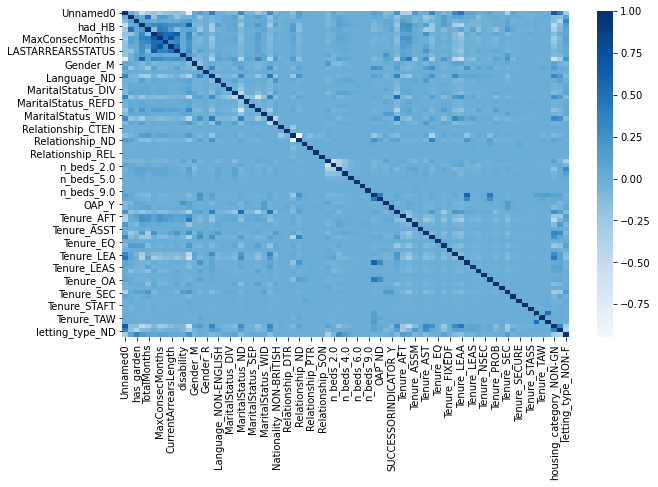

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df_model_dummies.corr(), center=0, cmap='Blues')

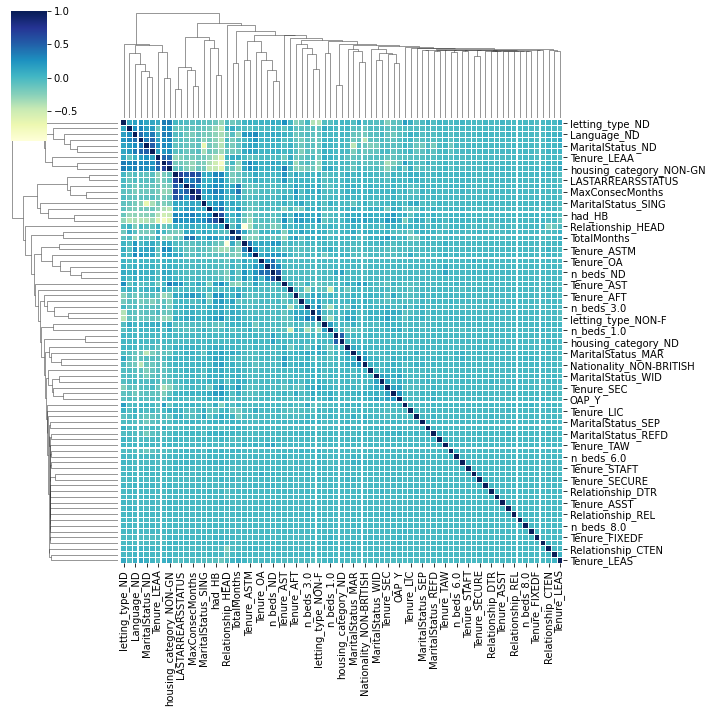

In [28]:
#clustered correlation matrix

#define correlation matrix
corr_matrix = df_model_dummies.corr() 

#build seaborn clustermap
clustermap = sns.clustermap(corr_matrix, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(clustermap.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
clustermap

In [29]:
#define function to get diagonal and lower triangular pairs of correlation matrix
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

#define function to get top absolute correlations from the previously defined matrix
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


In [30]:
#import further libraries
from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import Imputer
#apply imputer to treat missing values
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0)
df1 = pd.DataFrame(imp.fit_transform(df_model_dummies), index = df_model_dummies.index, columns = df_model_dummies.columns)
df1.head(5)

,Unnamed0,CurrentTenancy,has_garden,had_HB,TotalMonths,PercentageInArrears,MaxConsecMonths,LongtermArrearsNum,CurrentArrearsLength,LASTARREARSSTATUS,...,Tenure_SECM,Tenure_SECURE,Tenure_STAFT,Tenure_STASS,Tenure_STD,Tenure_TAW,housing_category_ND,housing_category_NON-GN,letting_type_ND,letting_type_NON-F
Ref,,,,,,,,,,,,,,,,,,,,,
28434,0.0,1.0,1.0,0.0,86.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,86.0,31.395349,19.0,2.0,8.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2.0,0.0,0.0,1.0,54.0,42.592593,16.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100312,3.0,1.0,0.0,1.0,32.0,3.125000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15440,4.0,1.0,0.0,1.0,86.0,40.697674,35.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#output top absolute correlations
print("Top Absolute Correlations")
print(get_top_abs_correlations(df1, 10))

Top Absolute Correlations
Relationship_HEAD    Relationship_ND            0.946469
Unnamed0             TenancyType_weekly         0.822907
MaxConsecMonths      CurrentArrearsLength       0.719973
MaritalStatus_ND     MaritalStatus_SING         0.678719
PercentageInArrears  LASTARREARSSTATUS          0.665974
Unnamed0             housing_category_NON-GN    0.659646
PercentageInArrears  MaxConsecMonths            0.643388
TenancyType_weekly   housing_category_NON-GN    0.622126
n_beds_ND            Tenure_LEACP               0.611849
had_HB               TenancyType_weekly         0.601061
dtype: float64


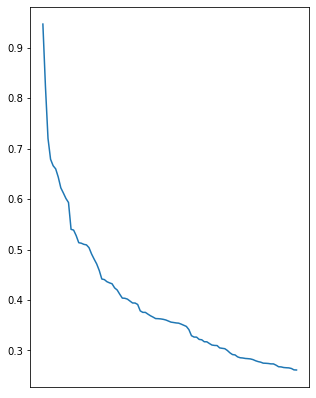

In [32]:
fig = get_top_abs_correlations(df_model_dummies, 100)
plt.xticks([])
fig.plot(figsize=(5,7))

In [33]:
#Splitting data into a training and test set (test set = 30%) and fitting a baseline model

from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = df_model_dummies.loc[:, df_model_dummies.columns != 'LASTARREARSSTATUS']
y = df_model_dummies.loc[:, 'LASTARREARSSTATUS']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.30, random_state=1234)

In [34]:
len(X.columns)

76

In [68]:
# Set the parameters by cross-validation
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        lgb, tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.913 (+/-0.004) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.913 (+/-0.004) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.913 (+/-0.004) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.913 (+/-0.004) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.913 (+/-0.004) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.913 (+/-0.004) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.913 (+/-0.004) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.913 (+/-0.004) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.913 (+/-0.004) for {'C': 1, 'kernel': 'linear'}
0.913 (+/-0.004) for {'C': 10, 'kernel': 'linear'}
0.913 (+/-0.004) for {'C': 100, 'kernel': 'linear'}
0.913 (+/-0.004) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on

In [70]:
parameters = {'kernel': ['rbf'], 'C':[1], 'gamma':[0.001]}

In [76]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier

# running k=10 folds cross-validation
lgb_scores = cross_val_score(LGBMClassifier(), X_train, y_train, cv=10, scoring='accuracy') 
print('LightGBM CV Scores:',lgb_scores)
print('\n','Mean of CV Scores:',lgb_scores.mean())

#fitting model and predicting
lgb = LGBMClassifier()

lgb.fit(X_train, y_train)
lgb_predictions = lgb.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('\n','LightGBM Accuracy Score:',accuracy_score(y_test, lgb_predictions))
print('\n','LightGBM Classification Report:','\n',classification_report(y_test, lgb_predictions))

LightGBM CV Scores: [0.90926158 0.90894869 0.9120776  0.92146433 0.9083229  0.9155194
 0.91113892 0.90863579 0.91145181 0.91643192]

 Mean of CV Scores: 0.9123252951165481

 LightGBM Accuracy Score: 0.9123959702146299

 LightGBM Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      8381
           1       0.92      0.85      0.88      5317

    accuracy                           0.91     13698
   macro avg       0.91      0.90      0.91     13698
weighted avg       0.91      0.91      0.91     13698



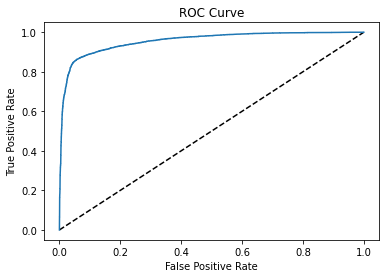

AUC: 0.9558939492022502


In [45]:
# Import necessary modules
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
lgb_y_pred_prob = lgb.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, lgb_y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Compute and print Area Under Curve: AUC score
print("AUC: {}".format(roc_auc_score(y_test, lgb_y_pred_prob)))

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# running k=10 folds cross-validation
GradientBoosting_scores = cross_val_score(GradientBoostingClassifier(), X_train, y_train, cv=10, scoring='accuracy') 
print('GradientBoosting CV Scores:',GradientBoosting_scores)
print('\n','Mean of CV Scores:',GradientBoosting_scores.mean())

#fitting model and prediction = GradientBoostingClassifier()
GradientBoosting = GradientBoostingClassifier()

GradientBoosting.fit(X_train, y_train)

GradientBoosting_predictions = GradientBoosting.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('\n','GradientBoosting Accuracy Score:',accuracy_score(y_test, GradientBoosting_predictions))
print('\n','GradientBoosting Classification Report:','\n',classification_report(y_test, GradientBoosting_predictions))

GradientBoosting CV Scores: [0.9083229  0.90863579 0.91020025 0.92177722 0.90926158 0.91583229
 0.9120776  0.90988736 0.91239049 0.91549296]

 Mean of CV Scores: 0.9123878439598794

 GradientBoosting Accuracy Score: 0.913491020586947

 GradientBoosting Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      8381
           1       0.92      0.85      0.88      5317

    accuracy                           0.91     13698
   macro avg       0.91      0.90      0.91     13698
weighted avg       0.91      0.91      0.91     13698



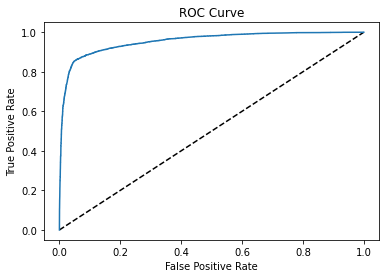

AUC: 0.9548478396631265


In [47]:
# Import necessary modules
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
GradientBoosting_y_pred_prob = GradientBoosting.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, GradientBoosting_y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Compute and print Area Under Curve: AUC score
print("AUC: {}".format(roc_auc_score(y_test, GradientBoosting_y_pred_prob)))

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# running k=10 folds cross-validation
gaussianNB_scores = cross_val_score(GaussianNB(), X_train, y_train, cv=10, scoring='accuracy') 
print('GaussianNB CV Scores:',gaussianNB_scores)
print('\n','Mean of CV Scores:',gaussianNB_scores.mean())

#fitting model and prediction = GradientBoostingClassifier()
gaussianNB = GaussianNB()
gaussianNB.fit(X_train, y_train)

gaussianNB_predictions = gaussianNB.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('\n','GaussianNB Accuracy Score:',accuracy_score(y_test, gaussianNB_predictions))
print('\n','GaussianNB Classification Report:','\n',classification_report(y_test, gaussianNB_predictions))

GaussianNB CV Scores: [0.8097622  0.8135169  0.82196496 0.82790989 0.8063204  0.82790989
 0.81508135 0.81852315 0.81946183 0.81032864]

 Mean of CV Scores: 0.8170779201701658

 GaussianNB Accuracy Score: 0.82544897065265

 GaussianNB Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      8381
           1       0.81      0.72      0.76      5317

    accuracy                           0.83     13698
   macro avg       0.82      0.81      0.81     13698
weighted avg       0.82      0.83      0.82     13698



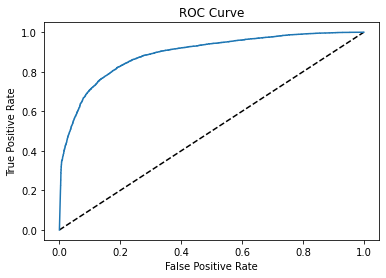

AUC: 0.8914987725915867


In [49]:
# Import necessary modules
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
gaussianNB_y_pred_prob = gaussianNB.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, gaussianNB_y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Compute and print Area Under Curve: AUC score
print("AUC: {}".format(roc_auc_score(y_test, gaussianNB_y_pred_prob)))

In [52]:
from sklearn.linear_model import LogisticRegression

# running k=10 folds cross-validation
logreg_scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=10, scoring='accuracy') 
print('Logistic Regression CV Scores:',logreg_scores)
print('\n','Mean of CV Scores:',logreg_scores.mean())

#fitting model and predicting
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_predictions = logreg.predict(X_test)

print('\n','Logistic Regression Accuracy Score:',accuracy_score(y_test, logreg_predictions))
print('\n','Logistic Regression Classification Report:','\n',classification_report(y_test, logreg_predictions))

Logistic Regression CV Scores: [0.85888611 0.86201502 0.86357947 0.87453066 0.86107635 0.86138924
 0.86295369 0.86451815 0.86733417 0.85915493]

 Mean of CV Scores: 0.8635437783144424

 Logistic Regression Accuracy Score: 0.8669878814425463

 Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.94      0.90      8381
           1       0.89      0.75      0.81      5317

    accuracy                           0.87     13698
   macro avg       0.87      0.85      0.86     13698
weighted avg       0.87      0.87      0.86     13698



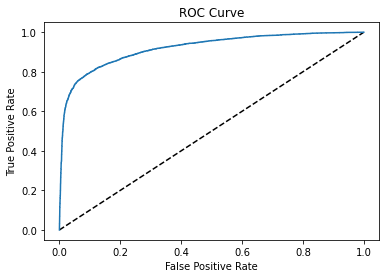

AUC: 0.919660385177189


In [53]:
# Compute predicted probabilities: y_pred_prob
logreg_y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, logreg_y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Compute and print Area Under Curve: AUC score
print("AUC: {}".format(roc_auc_score(y_test, logreg_y_pred_prob)))

In [50]:
from sklearn.ensemble import RandomForestClassifier

# running k=10 folds cross-validation
forest_scores = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=10, scoring='accuracy') 
print('Random Forest CV Scores:',forest_scores)
print('\n','Mean of CV Scores:',forest_scores.mean())

#fitting model and predicting
forest = RandomForestClassifier()

forest.fit(X_train, y_train)

forest_predictions = forest.predict(X_test)

print('\n','Random Forest Accuracy Score:',accuracy_score(y_test, forest_predictions))
print('\n','Random Forest Classification Report:','\n',classification_report(y_test, forest_predictions))

Random Forest CV Scores: [0.90738423 0.90362954 0.91113892 0.92021277 0.90581977 0.91489362
 0.90613267 0.90738423 0.90769712 0.91486698]

 Mean of CV Scores: 0.9099159845738314

 Random Forest Accuracy Score: 0.9106438896189225

 Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      8381
           1       0.91      0.85      0.88      5317

    accuracy                           0.91     13698
   macro avg       0.91      0.90      0.90     13698
weighted avg       0.91      0.91      0.91     13698



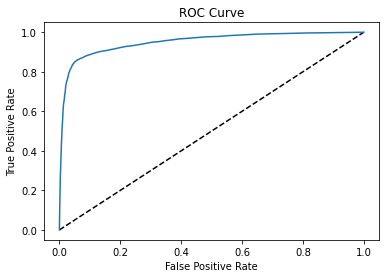

AUC: 0.9507397337408694


In [51]:
# Compute predicted probabilities: y_pred_prob
forest_y_pred_prob = forest.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, forest_y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Compute and print Area Under Curve: AUC score
print("AUC: {}".format(roc_auc_score(y_test, forest_y_pred_prob)))

In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

# running k=10 folds cross-validation
linearDiscriminantAnalysis_scores = cross_val_score(LinearDiscriminantAnalysis(), X_train, y_train, cv=10, scoring='accuracy') 
print('LinearDiscriminantAnalysis CV Scores:',linearDiscriminantAnalysis_scores)
print('\n','Mean of CV Scores:',linearDiscriminantAnalysis_scores.mean())

#fitting model and prediction = LinearDiscriminantAnalysis()
linearDiscriminantAnalysis = LinearDiscriminantAnalysis()

linearDiscriminantAnalysis.fit(X_train, y_train)

linearDiscriminantAnalysis_predictions = linearDiscriminantAnalysis.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('\n','LinearDiscriminantAnalysis Accuracy Score:',accuracy_score(y_test, linearDiscriminantAnalysis_predictions))
print('\n','LinearDiscriminantAnalysis Classification Report:','\n',classification_report(y_test, linearDiscriminantAnalysis_predictions))

LinearDiscriminantAnalysis CV Scores: [0.84355444 0.8416771  0.84292866 0.86045056 0.84762203 0.85481852
 0.83854819 0.84324155 0.84574468 0.85007825]

 Mean of CV Scores: 0.8468663979426552

 LinearDiscriminantAnalysis Accuracy Score: 0.8491020586946999

 LinearDiscriminantAnalysis Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      8381
           1       0.87      0.72      0.79      5317

    accuracy                           0.85     13698
   macro avg       0.85      0.83      0.84     13698
weighted avg       0.85      0.85      0.85     13698



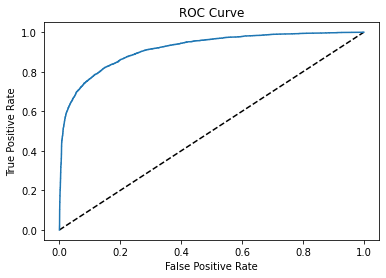

AUC: 0.9172747307630932


In [55]:
# Import necessary modules
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
linearDiscriminantAnalysis_y_pred_prob = linearDiscriminantAnalysis.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, linearDiscriminantAnalysis_y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Compute and print Area Under Curve: AUC score
print("AUC: {}".format(roc_auc_score(y_test, linearDiscriminantAnalysis_y_pred_prob)))

In [56]:
from sklearn.metrics import f1_score


comparison = pd.DataFrame(columns=['Accuracy','F1 Score','AUC'], index=['GradientBoosting','Logistic Regression'])

comparison.loc['LightGBM'] = pd.Series({'Accuracy':(accuracy_score(y_test, lgb_predictions)*100).round(1),
                                       'F1 Score':(f1_score(y_test, lgb_predictions,average='weighted')*100).round(1),
                                       'AUC':(roc_auc_score(y_test, lgb_y_pred_prob)*100).round(1)})
comparison.loc['GradientBoosting'] = pd.Series({'Accuracy':(accuracy_score(y_test, GradientBoosting_predictions)*100).round(1),
                                       'F1 Score':(f1_score(y_test, GradientBoosting_predictions,average='weighted')*100).round(1),
                                       'AUC':(roc_auc_score(y_test, GradientBoosting_y_pred_prob)*100).round(1)})
comparison.loc['LinearDiscriminantAnalysis'] = pd.Series({'Accuracy':(accuracy_score(y_test, linearDiscriminantAnalysis_predictions)*100).round(1),
                                       'F1 Score':(f1_score(y_test, linearDiscriminantAnalysis_predictions,average='weighted')*100).round(1),
                                       'AUC':(roc_auc_score(y_test, linearDiscriminantAnalysis_y_pred_prob)*100).round(1)})
comparison.loc['Random Forest'] = pd.Series({'Accuracy':(accuracy_score(y_test, forest_predictions)*100).round(1),
                                       'F1 Score':(f1_score(y_test, forest_predictions,average='weighted')*100).round(1),
                                       'AUC':(roc_auc_score(y_test, forest_y_pred_prob)*100).round(1)})
comparison.loc['Logistic Regression'] = pd.Series({'Accuracy':(accuracy_score(y_test, logreg_predictions)*100).round(1),
                                       'F1 Score':(f1_score(y_test, logreg_predictions,average='weighted')*100).round(1),
                                       'AUC':(roc_auc_score(y_test, logreg_y_pred_prob)*100).round(1)})


comparison.sort_values(by=['AUC'],inplace=True,ascending=False)
display(comparison)

,Accuracy,F1 Score,AUC
LightGBM,91.2,91.2,95.6
GradientBoosting,91.3,91.3,95.5
Random Forest,91.1,91.0,95.1
Logistic Regression,86.7,86.4,92.0
LinearDiscriminantAnalysis,84.9,84.6,91.7


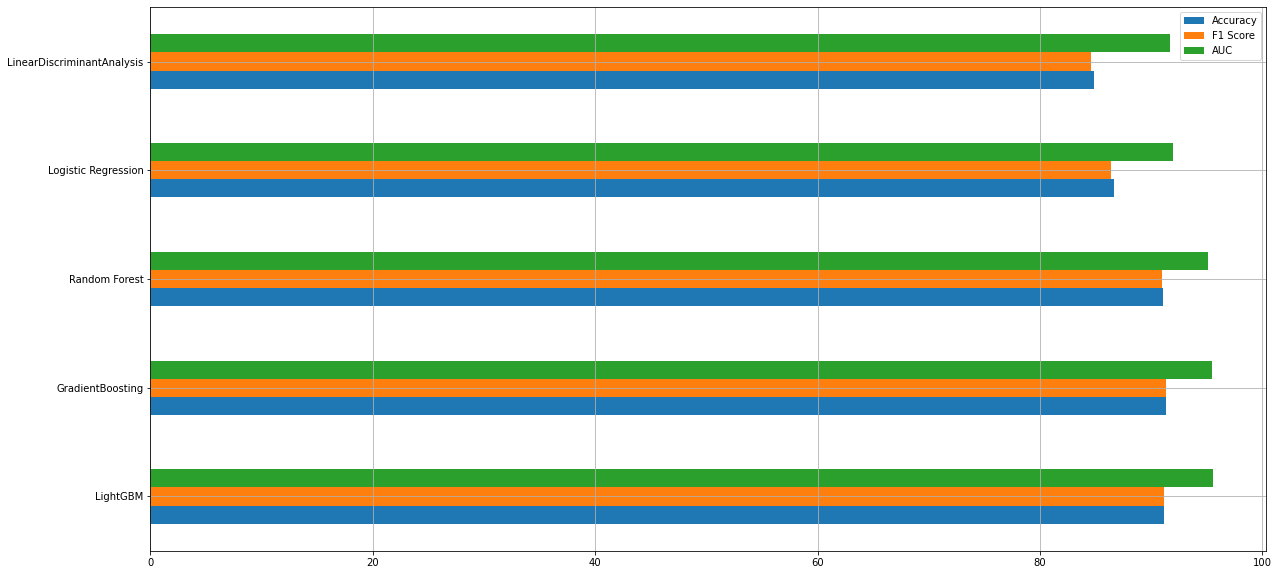

In [57]:
fig, ax=plt.subplots(figsize=(20,10))
comparison.plot(kind='barh',ax=ax)
ax.grid()

In [58]:
accuracy_gb, f1_gb, AUC_gb = precision_recall_curve(y_true=y_test, probas_pred=GradientBoosting.predict_proba(X_test)[:,1])
accuracy_nb, f1_nb, AUC_nb = precision_recall_curve(y_true=y_test, probas_pred=gaussianNB.predict_proba(X_test)[:,1])
accuracy_rf, f1_rf, AUC_rf = precision_recall_curve(y_true=y_test, probas_pred=forest.predict_proba(X_test)[:,1])

In [ ]:
# Plotting the new values for the logistic regression model and the Naive Bayes Classifier model.
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(accuracy_gb, AUC_gb, label='GradientBoosting')
ax.plot(accuracy_rf, AUC_rf, label='Random Forest')
ax.plot(accuracy_nb, AUC_nb, label='Gaussian Native Bayes')
ax.set_xlabel('Accuracy')
ax.set_ylabel('AUC')
ax.set_title('Accuracy_AUC Curve')
#ax.hlines(y=0.5, xmin=0, xmax=1, color='r')
ax.legend()
ax.grid();

In [ ]:
# Creating a confusion matrix for modified Gradient Boosting Classifier.
fig, ax = plt.subplots(figsize=(15,8))
ax.plot( f1_gb, accuracy_gb[1:], label='Accuracy')
ax.plot(f1_gb, AUC_gb[1:], label='AUC')
ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Accuracy, AUC')
ax.set_title('GradientBoosting: Accuracy-AUC')
ax.hlines(y=0.88, xmin=0, xmax=1, color='r')
ax.legend()
ax.grid();

In [83]:
#Ensemble models by stacking

from mlxtend.classifier import StackingClassifier
from sklearn import model_selection

sclf= StackingClassifier(classifiers=[lgb,logreg,GradientBoosting,forest,linearDiscriminantAnalysis],
                        use_probas=True,
                        meta_classifier=gaussianNB)

print('10=fold cross vallidation:\n')

for clf, label in zip([lgb,logreg,GradientBoosting,forest,linearDiscriminantAnalysis],
                     ['LightGBM',
                     'Logistic Regression',
                     'Gradient Boosting',
                     'Random Forest',
                     'LinearDiscriminantAnalysis']):
    stacking_scores = model_selection.cross_val_score(clf, X_train, y_train,
                                            cv=10, scoring = 'roc_auc')
    print('AUC Scores; %0.2f (+/- %0.2f) [%s]'
         % (stacking_scores.mean(),stacking_scores.std(),label))


10=fold cross vallidation:

AUC Scores; 0.95 (+/- 0.00) [LightGBM]
AUC Scores; 0.92 (+/- 0.00) [Logistic Regression]
AUC Scores; 0.95 (+/- 0.00) [Gradient Boosting]
AUC Scores; 0.95 (+/- 0.00) [Random Forest]
AUC Scores; 0.91 (+/- 0.00) [LinearDiscriminantAnalysis]


In [110]:
#Ensemble models by stacking
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection

sclf= StackingClassifier(classifiers=[lgb,GradientBoosting,forest],
                        use_probas=True,
                        meta_classifier=logreg)

stacking_scores = cross_val_score(sclf, X_train, y_train, cv=10, scoring='accuracy') 
print('Stacking Model CV Scores:',stacking_scores)
print('\n','Mean of CV Scores:',stacking_scores.mean())
#fitting model and predicting
stacking = sclf

stacking.fit(X_train, y_train)

stacking_predictions = stacking.predict(X_test)

print('\n','Stacking Classifier Accuracy Score:',accuracy_score(y_test, stacking_predictions))
print('\n','Stacking Classification Report:','\n',classification_report(y_test, stacking_predictions))

Stacking Model CV Scores: [0.90519399 0.90175219 0.90738423 0.91864831 0.90081352 0.91082603
 0.90613267 0.9048811  0.90613267 0.91079812]

 Mean of CV Scores: 0.9072562827948081

 Stacking Classifier Accuracy Score: 0.9072857351438166

 Stacking Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.94      0.93      8381
           1       0.90      0.85      0.88      5317

    accuracy                           0.91     13698
   macro avg       0.91      0.90      0.90     13698
weighted avg       0.91      0.91      0.91     13698



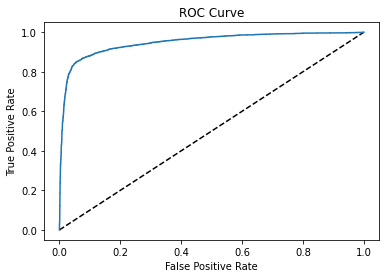

AUC: 0.9488132396515516


In [111]:
# Import necessary modules
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
stacking_y_pred_prob = stacking.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, stacking_y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Compute and print Area Under Curve: AUC score
print("AUC: {}".format(roc_auc_score(y_test, stacking_y_pred_prob)))

In [ ]:
# Add the result of prediction to the csv file.
change = np.hstack((X_test,lgb_predictions.reshape(-1,1)))
columns1 = list(X.columns) + ['predictions']
df = pd.DataFrame(change,columns=columns1)
df.head()

In [ ]:
df.to_csv('/kaggle/working/df_result.csv',encoding='utf-8')